# 2.2 Tests para muestras dependientes / medidas repetidas (R)

_Este cuaderno se basa en el guion en HTML. El texto ha sido limpiado y **no incluye salidas de ejemplo**; sólo explicaciones en español. Se han añadido subsubsecciones explícitas._

## Índice

- 2.2 Tests para muestras
dependientes o de medidas repetidas

In [1]:

# --- Preámbulo del cuaderno (R) ---
# Carga de funciones auxiliares
helper_paths <- c("IntrodEstadFunciones.R", "/mnt/data/IntrodEstadFunciones.R")
found <- helper_paths[file.exists(helper_paths)]
if (length(found) > 0) {
  source(found[1], encoding = "UTF-8")
  message("Funciones cargadas desde: ", found[1])
} else {
  message("Aviso: no se encontró 'IntrodEstadFunciones.R'. Colóquelo junto al notebook o ajuste la ruta.")
}

# Paquetes usados a lo largo del cuaderno
auto_install <- TRUE
req <- c("ggplot2","ggpubr","ggsci","dplyr","readr","rstatix","PMCMRplus","car","rstatix", "tidyverse", "DescTools")
if (auto_install) {
  to_install <- setdiff(req, rownames(installed.packages()))
  if (length(to_install)) install.packages(to_install)
}
suppressPackageStartupMessages({
  for (p in intersect(req, rownames(installed.packages()))) library(p, character.only = TRUE)
})
options(stringsAsFactors = FALSE)


Funciones cargadas desde: IntrodEstadFunciones.R



In [2]:
load("DatosEmpleados.RData")
datos = DatosEmpleados
v.depend = "salario"
v.factor.2.valores = "sexo"
indice.col.factor.2valores = which(colnames(datos) == v.factor.2.valores)
datos[,indice.col.factor.2valores] = as.factor(as.data.frame(datos)[,indice.col.factor.2valores])

## 2.2 Tests para muestras dependientes o de medidas repetidas

Tal y como vimos en el apartado de Jamovi, asumimos que las filas dentro de cada grupo son independientes entre sí. Obviamente, las filas de grupos distintos no son independientes entre sí.

Usaremos el sufijo (medidas repetidas) en los nombres de las variables y objetos que creemos.

### 2.2.1 Prueba T (t-Student) para dos muestras pareadas (medidas repetidas)

**Test**: ¿Puede considerarse que la diferencia entre las medias del salario actual y el salario inicial es cero?

Para lanzar el test T para muestras pareadas usando directamente el conjunto de datos original, podemos usar la función (observe que no es la función de). Le pasamos como parámetro los dos vectores correspondientes a las dos muestras pareadas (salario inicial y salario final) y, muy importante, el parámetro `paired = TRUE` (muestras dependientes):

En cualquier caso, la mayor parte de los tests sobre medidas repetidas los lanzaremos de otra forma. Necesitamos convertir los datos desde el formato **wide** al formato **long**.

#### Conversión de formato wide a long

En el ejemplo de los datos de empleados, queremos construir un nuevo conjunto de datos con dos variables nuevas:

Por una parte tendremos la variable nominal que puede verse como un factor intra sujetos. Dicha variable tendrá dos valores de tipo texto: `salario` (salario inicial) y `salini` (salario final). Observe que ambos valores son nominales (cadenas de texto) que coindicen con los nombres de las columnas originales.

Por otra parte, tendremos una nueva variable `Salario` (se ha usado una mayúscula al inicio para distinguirla de la columna original). Cada fila del conjunto original se desdoblará en dos: una fila contendrá el valor `salario` (texto) en la columna y el valor (dato de tipo real) del salario inicial en la columna. La otra fila contendrá el valor de texto `salini` en la columna y el valor del salario final (dato de tipo real) en la columna.

Este mismo proceso se generaliza con k grupos. Para realizar esta conversión, hacemos uso de la función `pivot_longer()` del paquete `tidyverse`.

#### Configuración de variables

Almacenamos en la variable `v.id.mr` el nombre de la columna del conjunto de datos que identifica a cada fila de forma unívoca (en nuestro caso `Id`). En el vector `columnas.mr` (columnas.medidas.repetidas) guardamos los nombres de las columnas que representan las medidas repetidas. En la variable `v.depend.mr` guardamos el nombre de la nueva variable dependiente que se va a crear. En la variable `v.factor.mr` guardamos el nombre de la nueva variable factor que vamos a crear, en nuestro caso `Tiempo`.

El resultado lo guardamos en el dataset `datos.mr.long`:

Convertimos también al tipo factor la variable nueva factor que hemos creado, así como la columna del identificador. Lo hacemos con los nombres genéricos que hemos introducido anteriormente:

#### Aplicación del test T

Ya tenemos preparado nuestro conjunto de datos para aplicar las funciones de `rstatix` (y de muchos otros paquetes de R). Si vamos a usar la función `t_test()` (observe que es `t_test()` y no `t.test()`) tenemos que usar la siguiente fórmula:

`Salario ~ Tiempo`

o usando el formato genérico con las variables anteriores:

Llamamos a la función con el parámetro `paired = TRUE`

#### Verificación de normalidad

Para comprobar la hipótesis de normalidad basta con calcular la columna formada por las diferencias de las dos muestras pareadas (ambas tienen el mismo tamaño) y aplicar el test de Shapiro o ver el gráfico QQ.

Podemos usar las columnas que habíamos construido (`salario` y `salini`) o bien creamos unas nuevas con los nombres genéricos que hemos introducido anteriormente:

Podemos apreciar que hay una desviación bastante notable de la normalidad por lo que será preferible aplicar un test no paramétrico.

**Nota**: También podríamos haber analizado los residuos: esto se verá posteriormente, cuando veamos el ANOVA general para medidas repetidas.

In [3]:
col.salario.inicial = datos$salario
col.salario.final = datos$salini
t.test.mr = t.test(col.salario.inicial, col.salario.final,
                   paired = TRUE)
t.test.mr


	Paired t-test

data:  col.salario.inicial and col.salario.final
t = 35.036, df = 473, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 16427.41 18379.56
sample estimates:
mean difference 
       17403.48 


In [4]:
datos.mr.wide = DatosEmpleados
v.id.mr = "Id"
columnas.mr = c("salario", "salini")
v.depend.mr = "Salario"
v.factor.mr = "Tiempo"
datos.mr.long = pivot_longer(datos.mr.wide,
                             cols = any_of(columnas.mr),
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

In [5]:
datos.mr.wide[c(1:3),]
datos.mr.long[c(1:6),]

,Id,sexo,fechnac,educ,catlab,salario,salini,tiempemp,expprev,minoría
,<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>
1,1,Hombre,2/3/1952,15,Directivo,57000,27000,98,144,No
2,2,Hombre,5/23/1958,16,Administrativo,40200,18750,98,36,No
3,3,Mujer,7/26/1929,12,Administrativo,21450,12000,98,381,No


Id,sexo,fechnac,educ,catlab,tiempemp,expprev,minoría,Tiempo,Salario
<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<fct>,<chr>,<int>
1,Hombre,2/3/1952,15,Directivo,98,144,No,salario,57000
1,Hombre,2/3/1952,15,Directivo,98,144,No,salini,27000
2,Hombre,5/23/1958,16,Administrativo,98,36,No,salario,40200
2,Hombre,5/23/1958,16,Administrativo,98,36,No,salini,18750
3,Mujer,7/26/1929,12,Administrativo,98,381,No,salario,21450
3,Mujer,7/26/1929,12,Administrativo,98,381,No,salini,12000


In [6]:
indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

In [7]:
formula.mr.sin.error = Salario ~ Tiempo

In [8]:
formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))
formula.mr.sin.error

Salario ~ Tiempo

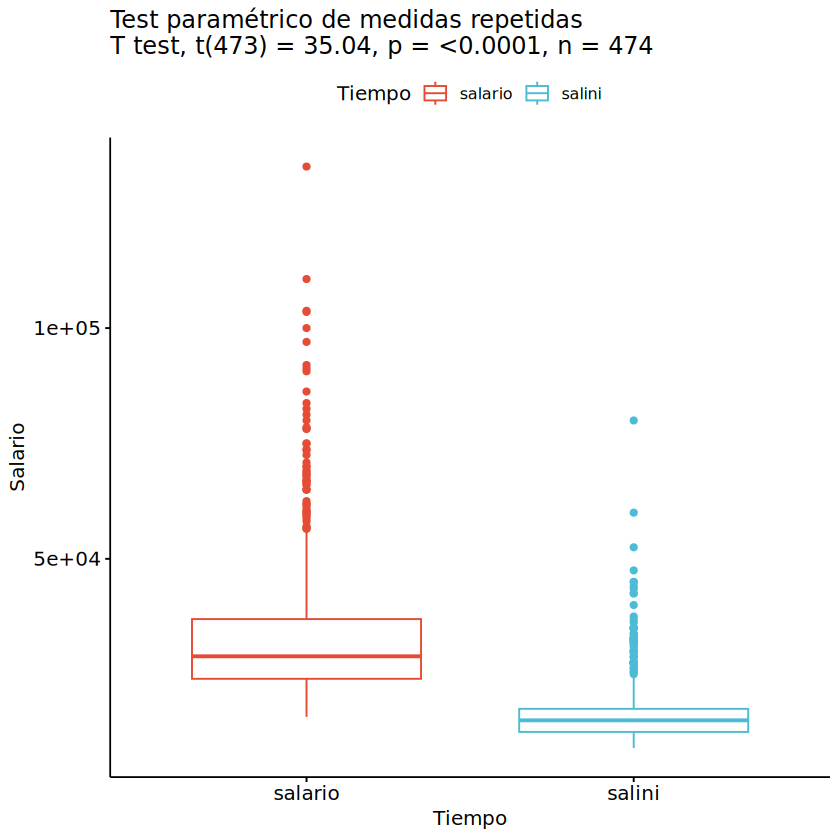

In [9]:
test_t_mr <- t_test(formula = formula.mr.sin.error,
                    data = datos.mr.long, paired = TRUE)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = TRUE, es_mr = TRUE, test_t_mr)


	Shapiro-Wilk normality test

data:  col.mr.1 - col.mr.2
W = 0.78168, p-value < 2.2e-16


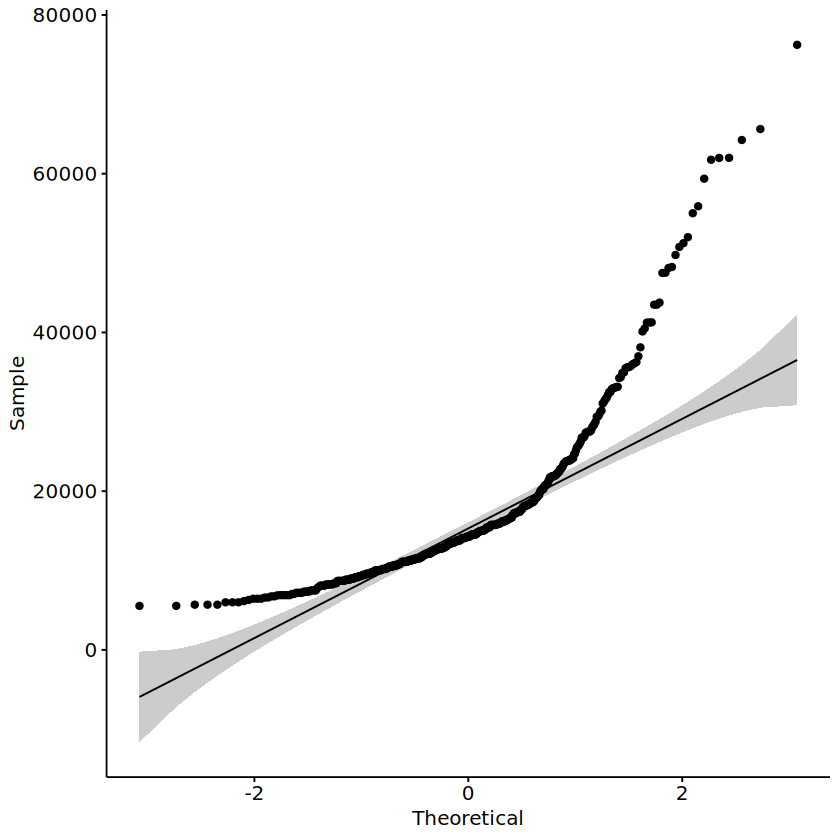

In [10]:
col.mr.1 = datos.mr.wide[,columnas.mr[1]]
col.mr.2 = datos.mr.wide[,columnas.mr[2]]
shapiro.test(x = col.mr.1 - col.mr.2)
ggqqplot(col.mr.1 - col.mr.2)

### 2.2.2 Test no paramétrico para comparar dos muestras dependientes (medidas repetidas)

**Test**: ¿Puede considerarse que la diferencia entre las medianas del salario inicial y el salario final es cero?

En el caso no paramétrico, debemos lanzar el test de Wilcoxon (**Wilcoxon signed-rank test**). Para ello, llamamos a la función `wilcox_test()` de `rstatix`. Le pasamos la misma fórmula que habíamos usado en el test t de 2 muestras con medidas repetidas e incluimos el parámetro `paired = TRUE`:

#### Verificación de simetría

Para poder asegurar que el test de Wilcoxon es fiable necesitamos comprobar el requisito de que las diferencias se distribuyen de forma simétrica con respecto a la mediana.

Vemos que no es una distribución simétrica, por lo que procedemos a aplicar el **sign-test** aplicando la función `sign_test()` de `rstatix`.

#### Test de signos

El sign-test sólo tiene en cuenta si un valor es mayor que otro, pero no cuánto más, por lo que pierde información y tiene menos potencia que el test de Wilcoxon.

Por lo tanto, a pesar de haber tenido que aplicar el sign-test que es menos potente que el de Wilcoxon, podemos concluir que las medianas son distintas y por tanto el salario mediano inicial es menor que el salario mediano final.

#### Nota sobre tests direccionales

Formalmente, para poder concluir cuál es mayor que la otra, deberíamos haber aplicado un test a una cola (**one-sided test**). Para ello habría que seleccionar la opción `alternative = "greater"` en la función `wilcox_test()` (o en la función `sign_test()`).

Salario ~ Tiempo

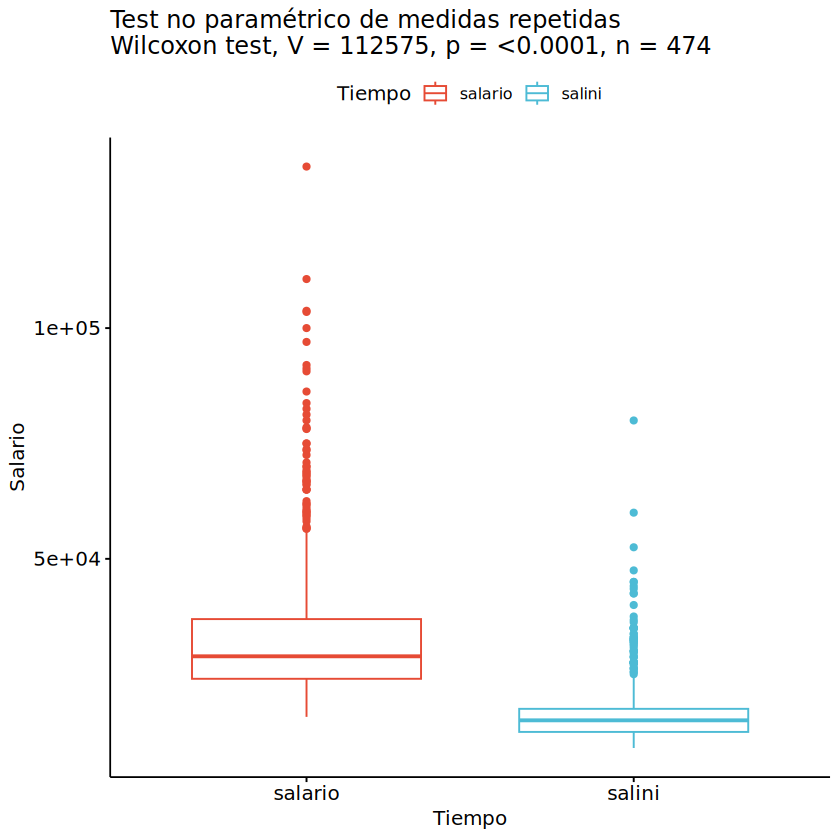

In [11]:
formula.mr.sin.error
test_wilcoxon_mr = wilcox_test(formula.mr.sin.error, data = datos.mr.long,
                               paired = TRUE)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_wilcoxon_mr)

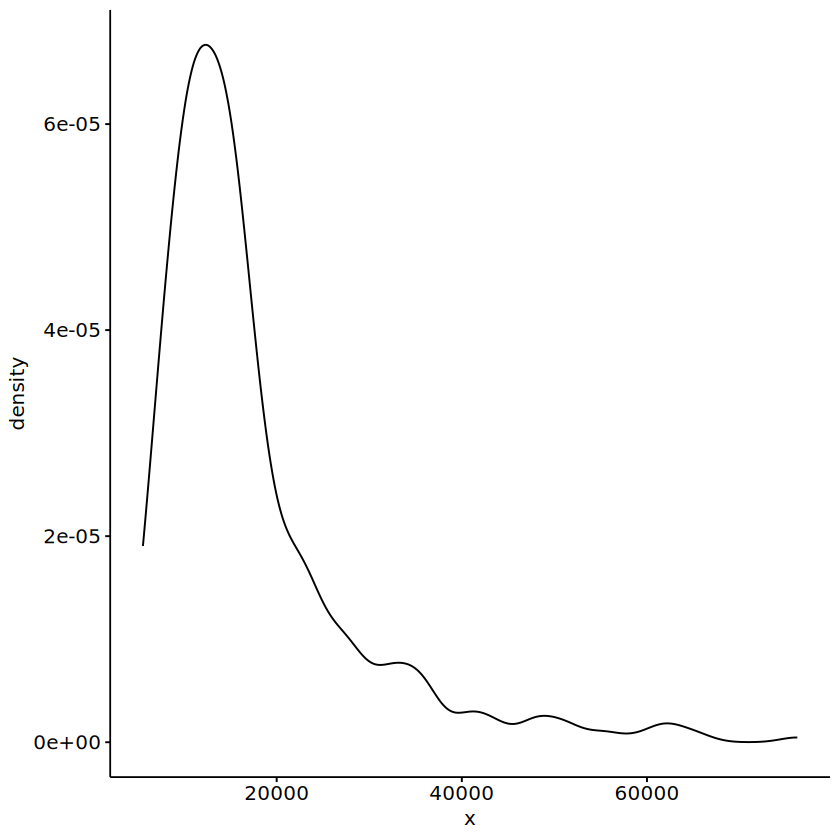

In [12]:
diferencias = col.mr.1 - col.mr.2
ggdensity(data = diferencias)

In [13]:
median(diferencias)

[1] 14250

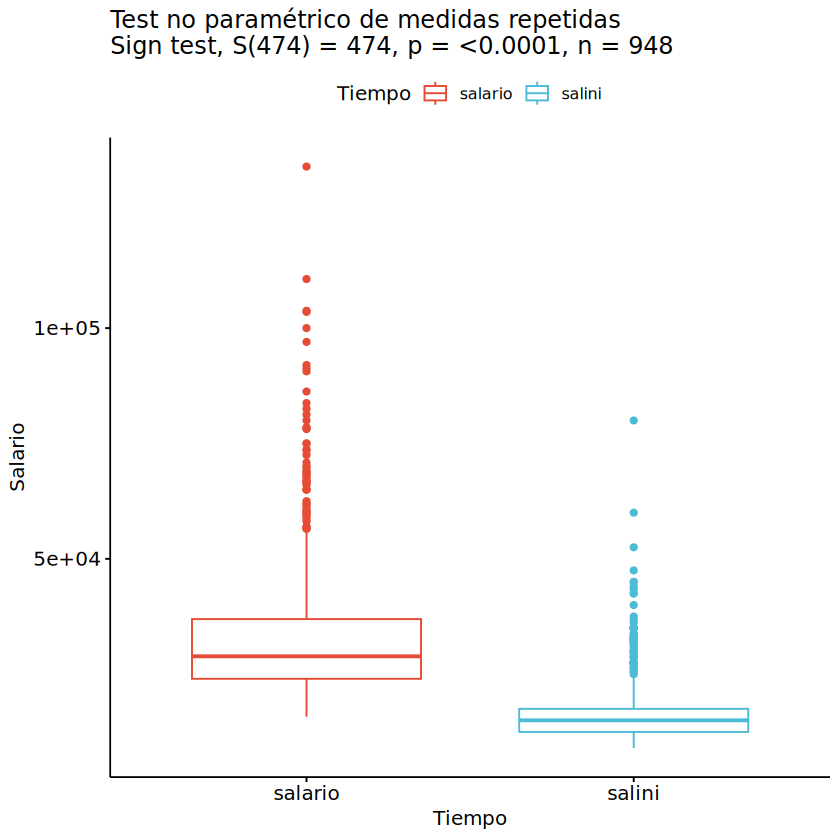

In [14]:
test_sign_mr = sign_test(formula.mr.sin.error, data = datos.mr.long)

GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_sign_mr)

### 2.2.3 Anova para k muestras dependientes (test paramétrico de medidas repetidas)

Trabajamos con el conjunto de datos `Cholesterol.RData`. Los datos vienen en formato **wide** por lo que tendrá que transformarlos en **long**.

Tenga en cuenta que el nombre del dataset es `Cholesterol`, el vector de columnas de medidas repetidas es `columnas.mr`, el nombre de la nueva variable dependiente puede ser `NivelColesterol`, el nombre de la nueva variable factor puede ser `Tiempo` y el nombre de la columna de identificador es `ID`.

Obtenemos los siguientes datos (mostramos como quedarían las dos primeras filas):

#### 2.2.3.1 Test conjunto (omnibus)

Para contemplar el caso de **k grupos de medidas repetidas**, tenemos que trabajar con la función `anova_test()` y con la siguiente fórmula:

`NivelColesterol ~ Tiempo + Error(ID / Tiempo)`

Para poder utilizar los nombres genéricos que hemos introducido en los apartados anteriores, usamos la siguiente expresión general:

Ahora ya estamos en condiciones de aplicar la función `anova_test()` de `rstatix`. Dicha función analiza el formato de la fórmula y al encontrar el término `Error()` aplica automáticamente un ANOVA de medidas repetidas:

Debemos señalar que la función `anova_test()` automáticamente aplica el **test de Mauchly** para comprobar la hipótesis de **esfericidad** y en el caso de que no se cumpla, aplica también automáticamente la **corrección de Greenhouse-Geisser**.

**Como ejercicio**, escriba la fórmula correspondiente al ejemplo de los datos de los empleados y lance la función `anova_test()`. El resultado es equivalente al que obtuvimos en el apartado test para dos muestras dependientes con la función `t_test()` (puede comprobar que el valor de F obtenido en el ANOVA es el cuadrado de la t).

#### Verificación de normalidad de residuos

Para ver la normalidad de los residuos, definimos la siguiente función que extrae los residuos del modelo. Al igual que vimos en el apartado **Prueba para dos muestras independientes (test paramétrico)**, usamos una función similar (hemos definido `ResiduosMR()` usando la función `anova_test()` de `rstatix`):

Llamamos a la función y mostramos los residuos:

Podemos apreciar que los residuos se ajustan a una normal, por lo que se cumplen las hipótesis del test paramétrico (realmente no se cumplía el requisito de esfericidad pero el test lo solventa automáticamente aplicando la corrección sobre los grados de libertad de Greenhouse-Geisser).

Por tanto podemos concluir que existe al menos un grupo con una media distinta de los otros grupos: en nuestro ejemplo, el nivel de colesterol al inicio del estudio es mayor que el nivel medido después de 4 y 8 semanas de tratamiento.

A continuación, procedemos a ejecutar el post-hoc para corroborar la anterior afirmación y para comprobar si hay diferencias significativas entre el nivel de colesterol medido a las 4 y a las 8 semanas.

#### 2.2.3.2 Post hoc

**Post hoc específico**

Para lanzar un test específico de comparaciones múltiples como el de Tukey, tendríamos que recurrir a otros paquetes y ajustar otros modelos que se escapan del nivel de este guion. Para más información, puede consultar: https://stackoverflow.com/questions/74839746/anova-with-repeated-measures-and-tukeyhsd-post-hoc-test-in-r

**Post hoc genérico**

Para lanzar las comparaciones múltiples con un test genérico y una penalización del nivel de significación (por ejemplo, Holm) usamos la función `pairwise_t_test()` de `rstatix` (es un wrapper de `pairwise.t.test()`).

Es muy importante que observe que se lanza con la misma fórmula que habíamos usado en el caso de 2 muestras dependientes y **no** la fórmula que contenía el término del error. También incluimos el parámetro `paired = TRUE`:

El resultado del test nos dice que también hay diferencias significativas entre el primer y segundo grupo (medición después de 4 y 8 semanas).

Si lanzamos el mismo test planteando como hipótesis alternativa "la media de un grupo es mayor o igual que la del otro grupo" (opción `alternative = "greater"` de la función `pairwise_t_test()`), obtendríamos una significación de 0.002 entre los dos primeros grupos (sigue siendo significativa).

#### Conclusiones

En definitiva, podemos concluir que gracias al tratamiento se aprecia una bajada del nivel de colesterol muy acusada en las 4 primeras semanas y otra bajada, mucho menor pero significativa, entre la cuarta y octava semana.

**Post hoc con control**

Si queremos fijar un grupo de control, podemos llamar a la misma función anterior `pairwise_t_test()`, indicándolo en el parámetro `ref.group`.

In [15]:
load("Cholesterol.RData")
datos.mr.wide = Cholesterol
nombres.columnas = colnames(datos.mr.wide)
v.id.mr = nombres.columnas[1]  # El identific. es la primera columna
v.depend.mr = "NivelColesterol"
v.factor.mr = "Tiempo"
columnas.mr = nombres.columnas[-1]  # El resto de columnas son las MR

datos.mr.long = pivot_longer(datos.mr.wide,
                             cols = any_of(columnas.mr),
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))

In [16]:
datos.mr.wide[c(1:2),]
datos.mr.long[c(1:6),]

,ID,Before,After4weeks,After8weeks
,<int>,<dbl>,<dbl>,<dbl>
1,1,6.42,5.83,5.75
2,2,6.76,6.20,6.13


ID,Tiempo,NivelColesterol
<fct>,<fct>,<dbl>
1,Before,6.42
1,After4weeks,5.83
1,After8weeks,5.75
2,Before,6.76
2,After4weeks,6.20
2,After8weeks,6.13


In [17]:
formula.anova.mr.error = NivelColesterol ~ Tiempo + Error(ID / Tiempo)

In [18]:
formula.anova.mr.error = as.formula(paste0(v.depend.mr, "~",
                                    v.factor.mr, "+ Error(" ,
                                    v.id.mr , "/" , v.factor.mr , ")"))
formula.anova.mr.error

NivelColesterol ~ Tiempo + Error(ID/Tiempo)

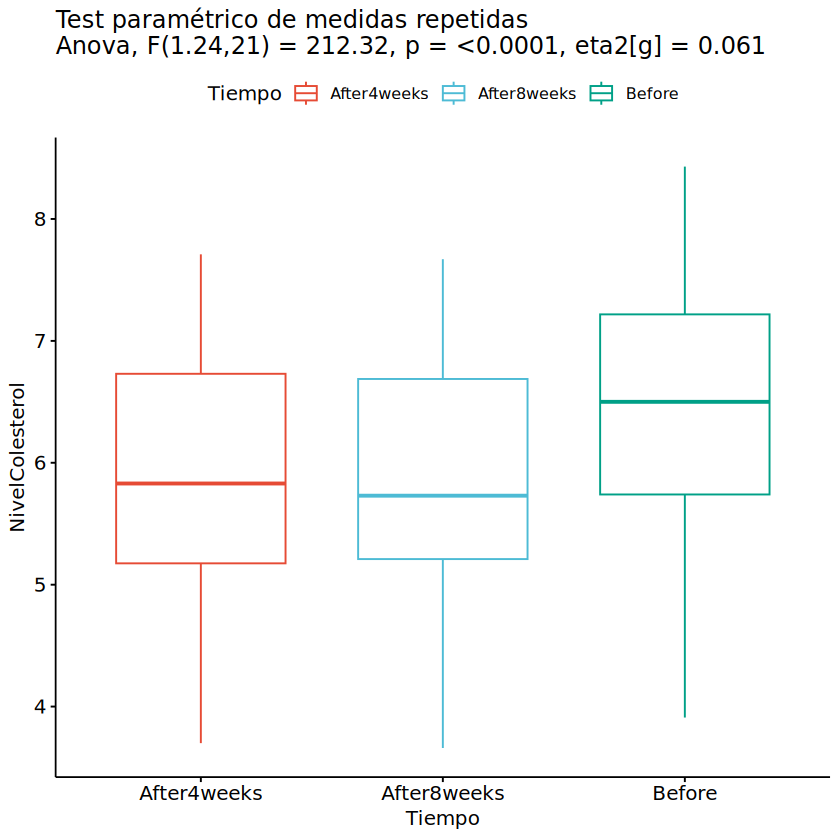

In [19]:
test_anova_mr <- anova_test(formula = formula.anova.mr.error,
                            data = datos.mr.long)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = TRUE, es_mr = TRUE, test_anova_mr)

In [20]:
ResiduosMR = function(data.long, var.depend.mr, var.factor.mr, var.id.mr, columnas.mr){
  formula.anova.mr.error = as.formula(paste0(var.depend.mr, "~",
                                    var.factor.mr, "+ Error(" ,
                                    var.id.mr , "/" , var.factor.mr , ")"))
  test_anova_mr = anova_test(formula.anova.mr.error, data = data.long)
  residuos_anova_test_mr = residuals(attr(test_anova_mr, "args")$model)
  # Me da los residuos por cada columna, por lo que hay que agregarlos todos:
  residuos.juntos.mr = pivot_longer(as.data.frame(residuos_anova_test_mr),
                                    cols = any_of(columnas.mr))
  residuos.juntos.mr  = residuos.juntos.mr$value
}

NivelColesterol ~ Tiempo + Error(ID/Tiempo)

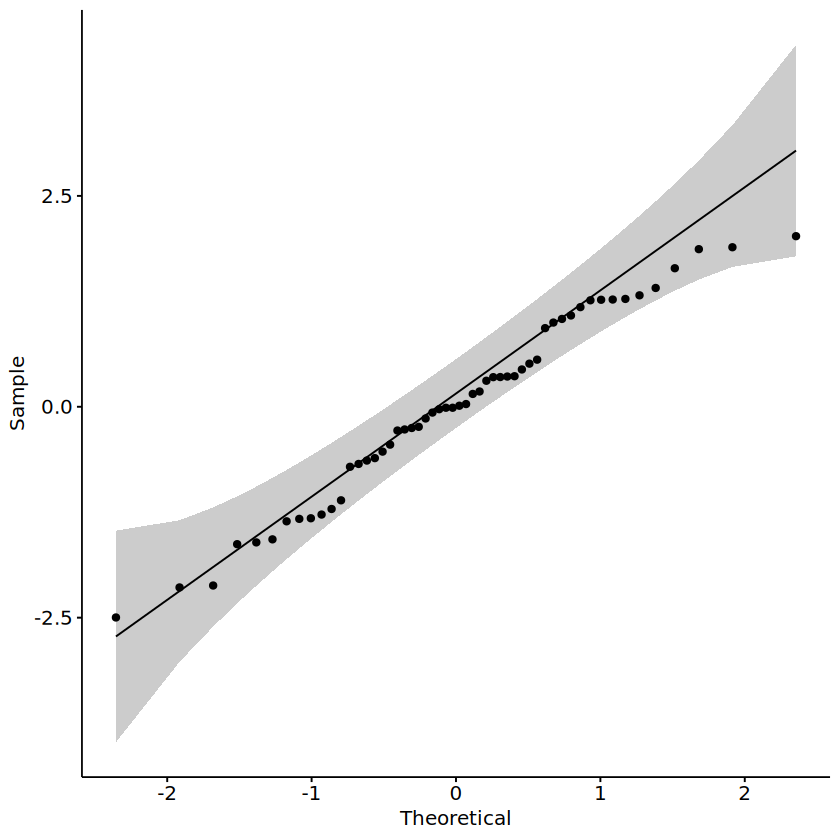

In [21]:
formula.anova.mr.error
residuos.mr = ResiduosMR(datos.mr.long, v.depend.mr, v.factor.mr,
                         v.id.mr, columnas.mr)
ggqqplot(residuos.mr)

NivelColesterol ~ Tiempo

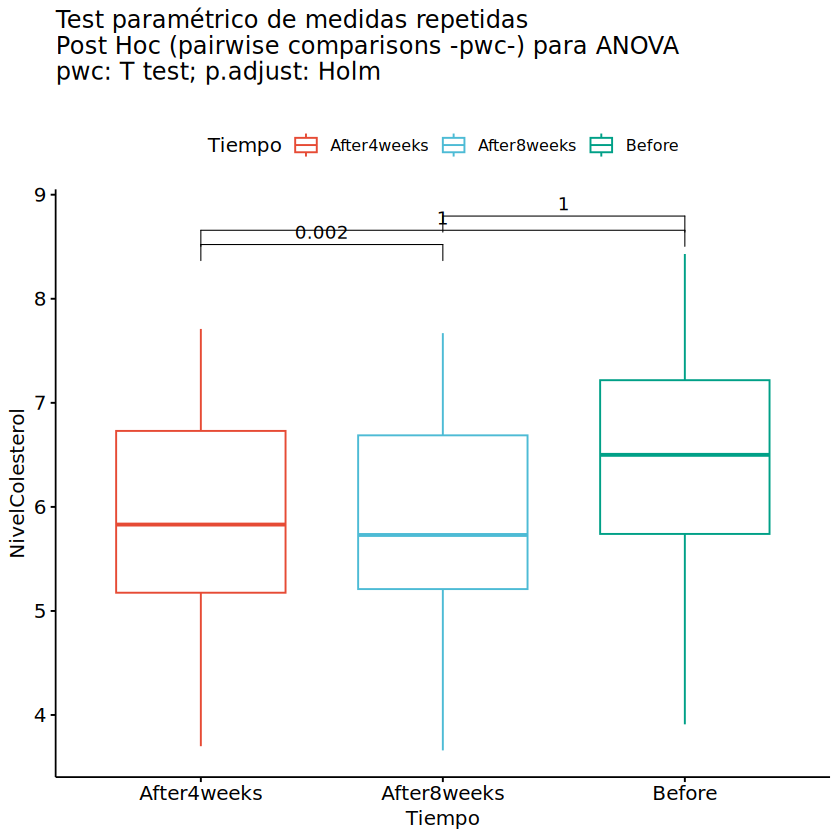

In [23]:
formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))
formula.mr.sin.error

post_pw_t_test_mr = pairwise_t_test(formula.mr.sin.error,
                                    data = datos.mr.long,
                                    paired = TRUE,
                                    p.adjust.method = "holm",
                                    alternative = "greater")
GraficoCajasPost(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = TRUE , es_mr = TRUE,
                 post_pw_t_test_mr)

### 2.2.4 Anova para k muestras dependientes (test no paramétrico de medidas repetidas)

Aplicaremos este tipo de tests cuando no se de el requisito de normalidad del caso paramétrico o cuando los datos sean ordinales, como es el caso del ejemplo sobre **preferencias comerciales** que vimos en la sección de Jamovi: **Friedman**.

Vamos a trabajar con este conjunto de datos. La versión en R la puede descargar del siguiente enlace: **Preferencias comerciales (RData)**

Establecemos los nombres de las variables y realizamos la transformación al formato **long**:

#### 2.2.4.1 Test conjunto (omnibus)

El test aplicable en este caso es el de **Friedman**. La fórmula que debemos usar ahora es de la forma:

`var.dependiente ~ factor | identificador`

En nuestro caso sería:

`Valoracion ~ Marca | id`

o en general, usando los nombres de las variables que habíamos creado:

Basta llamar a la función `friedman_test()` de `rstatix`:

#### Verificación de distribuciones similares

Finalmente, para comprobar si todos los grupos tienen distribuciones similares, lanzamos la función:

Al tener distribuciones similares, podemos afirmar que el test de Friedman es un test sobre las **medianas** (en caso contrario sería de **dominancia estocástica**).

Así pues, podemos concluir que hay al menos una marca comercial que tiene una preferencia distinta a las otras marcas.

#### 2.2.4.2 Post hoc

**Post hoc específico**

Jamovi lanza el test de **Durbin**, pero como ya vimos, no aplica ninguna penalización interna. Lo correcto sería lanzarlo con una corrección como **Holm**.

Para lanzar un test específico de comparaciones múltiples para Friedman, podemos recurrir a los tests incluidos en el paquete `PMCMRplus` (**Nemenyi**, **Durbin**, etc.)

Muchos de los tests de `PMCMRplus` requieren que se indiquen los siguientes parámetros:
- `y` es un vector con los datos de la variable dependiente  
- `groups` es un vector con los datos del factor  
- `blocks` es un vector con los datos del identificador  

Los vectores anteriores se refieren al conjunto de datos en el formato **long**. Construimos por tanto los siguientes vectores:

Vemos que, efectivamente, el test que lanzaba Jamovi ofrece unos valores de significación más bajos, resultado de no haber controlado el error FWER, por lo que no son fiables.

Además, el test de Durbin está diseñado para el caso de **bloques incompletos** (**incomplete block design**) por lo que mejor aplicamos un post hoc como el de **Nemenyi** o el test más actual de **Eisinga (2017)**, usando la función `frdAllPairsExactTest()`:

Podemos apreciar que hay dos grupos, el formado por `A` y `B` y otro formado por `C` y `D`. Tanto `A` como `B` son marcas con una menor preferencia por parte de los clientes que cualquiera de las marcas `C` y `D`.

**Post hoc genérico**

El post hoc usando un test genérico con penalización lo hacemos de una forma análoga al caso paramétrico. En ese caso, habíamos usado la fórmula básica sin término de error y la función `pairwise_t_test()`.

Ahora usamos una fórmula análoga y la función `pairwise_wilcox_test()` que aplica el test no paramétrico para 2 muestras pareadas de Wilcoxon (**Wilcoxon signed rank test**) a todos los pares. Debemos pasar como parámetro `paired = TRUE`. Por defecto usa la penalización de **Holm**:

**Nota**: También se puede usar la función `wilcox_test()`. Esta función realiza automáticamente las comparaciones múltiples cuando ve que el factor tiene más de un valor.

De nuevo, podemos apreciar que se distinguen los mismos grupos con medias distintas: el formado por `A` y `B` y el formado por `C` y `D`.

#### Verificación de simetría para Wilcoxon

En cualquier caso, para poder aplicar cada una de las comparaciones múltiples con el **Wilcoxon signed rank test** deberíamos confirmar que las distribuciones de todas las diferencias son simétricas.

Para ello, podemos construir todas las posibles combinaciones de las columnas con `CombPairs()` y realizar un plot de las densidades de dichas diferencias:

Es aceptable admitir que todas las anteriores distribuciones son simétricas, por lo que el post-hoc genérico también encuentra significativa la diferencia entre los grupos `A` y `C`, y `B` y `D`.

**Post hoc con control**

También podemos seleccionar un **control**, fijando un grupo y comparando el resto con él. Para ello, podemos usar la función `frdManyOneExactTest()` que implementa el post hoc con control de **Eisinga** (también está disponible el de **Nemenyi** a través de la función `frdManyOneNemenyiTest()`).

**IMPORTANTE**: El control se establece según el orden lexicográfico entre los nombres de las columnas.

Podemos ver que, al haber fijado un grupo de control y disminuir el número de comparaciones, hemos rebajado el p-value de la comparación entre `A` y `B` de 0.182 a 0.091, aunque no lo suficiente como para que sea significativo.

In [24]:
load("CommercialRatings.RData")
datos.mr.wide = CommercialRatings
nombres.columnas = colnames(datos.mr.wide)
v.id.mr = nombres.columnas[1]  # El identific. es la primera columna
v.depend.mr = "Valoracion"
v.factor.mr = "Marca"
columnas.mr = nombres.columnas[-1]  # El resto de columnas son las MR

datos.mr.long = pivot_longer(datos.mr.wide,
                             cols = any_of(columnas.mr),
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

datos.mr.wide[c(1:2),]

datos.mr.long[c(1:8),]

,id,com_1,com_2,com_3,com_4
,<dbl>,<int>,<int>,<int>,<int>
1,1,2,6,7,6
2,2,1,7,7,6


id,Marca,Valoracion
<fct>,<fct>,<int>
1,com_1,2
1,com_2,6
1,com_3,7
1,com_4,6
2,com_1,1
2,com_2,7
2,com_3,7
2,com_4,6


In [25]:
var.dependiente ~ factor | identificador

var.dependiente ~ factor | identificador

In [26]:
Valoracion ~ Marca | id

Valoracion ~ Marca | id

In [27]:
formula.anova.friedman_test = as.formula(paste0(v.depend.mr, "~",
                                                v.factor.mr , "|" ,
                                                v.id.mr))

Valoracion ~ Marca | id

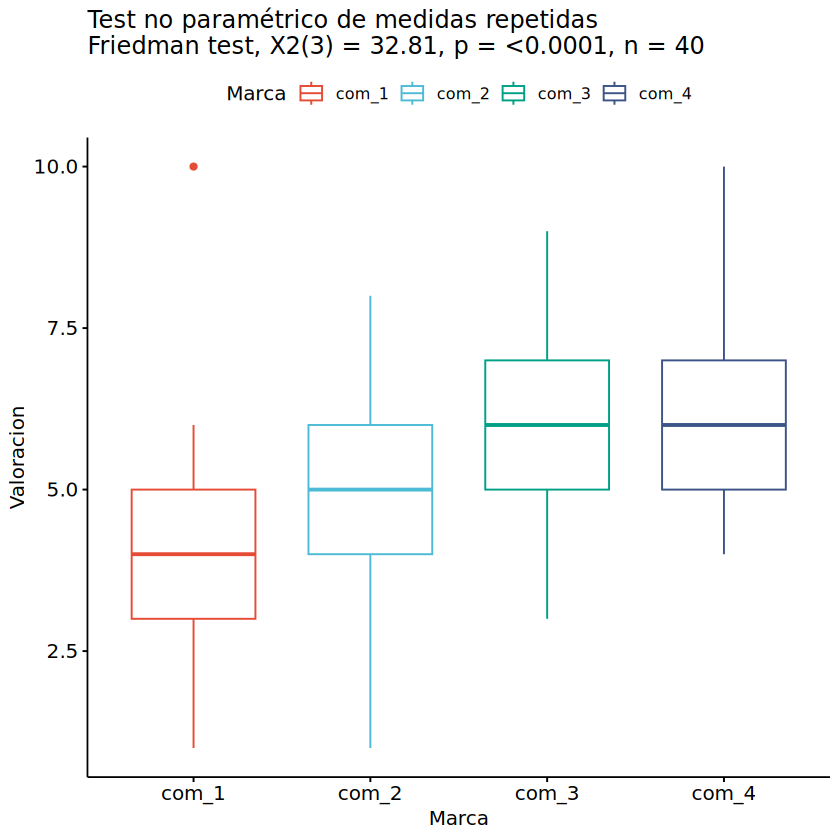

In [28]:
formula.anova.friedman_test

test_friedman = friedman_test (formula.anova.friedman_test,
                               data = datos.mr.long)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_friedman)

In [29]:
col.v.depend.mr = as.data.frame(datos.mr.long)[,v.depend.mr]
col.v.factor.mr = as.data.frame(datos.mr.long)[,v.factor.mr]
col.id.factor.mr = as.data.frame(datos.mr.long)[,v.id.mr]

head(datos.mr.long)

a_mostrar = c(1:6)
col.v.depend.mr[a_mostrar]
col.v.factor.mr[a_mostrar]
col.id.factor.mr[a_mostrar]

id,Marca,Valoracion
<fct>,<fct>,<int>
1,com_1,2
1,com_2,6
1,com_3,7
1,com_4,6
2,com_1,1
2,com_2,7


[1] 2 6 7 6 1 7

[1] com_1 com_2 com_3 com_4 com_1 com_2
Levels: com_1 com_2 com_3 com_4

[1] 1 1 1 1 2 2
40 Levels: 1 2 5 8 9 10 11 12 14 15 16 17 19 21 22 24 27 28 29 30 31 33 ... 59

In [30]:
post_frd_durbin_Jamovi <- durbinAllPairsTest(y = col.v.depend.mr ,
                                             groups = col.v.factor.mr,
                                             blocks = col.id.factor.mr,
                                             p.adjust.method = "none")

post_frd_durbin_holm <- durbinAllPairsTest(y = col.v.depend.mr,
                                            groups = col.v.factor.mr,
                                            blocks = col.id.factor.mr,
                                            p.adjust.method = "holm")
post_frd_durbin_Jamovi

post_frd_durbin_holm


	Pairwise comparisons using Durbin's all-pairs test for a two-way balanced incomplete block design


data: col.v.depend.mr, col.v.factor.mr and col.id.factor.mr



P value adjustment method: none



      com_1   com_2  com_3 
com_2 0.0325  -      -     
com_3 2.1e-07 0.0011 -     
com_4 2.1e-07 0.0011 1.0000


	Pairwise comparisons using Durbin's all-pairs test for a two-way balanced incomplete block design


data: col.v.depend.mr, col.v.factor.mr and col.id.factor.mr



P value adjustment method: holm



      com_1   com_2  com_3 
com_2 0.0651  -      -     
com_3 1.3e-06 0.0043 -     
com_4 1.3e-06 0.0043 1.0000

In [31]:
post_frd_eisinga <- frdAllPairsExactTest(y = col.v.depend.mr ,
                                         groups = col.v.factor.mr,
                                         blocks = col.id.factor.mr,
                                         p.adjust.method = "holm")

post_frd_eisinga


	Pairwise comparisons using Eisinga, Heskes, Pelzer & Te Grotenhuis all-pairs test with exact p-values for a two-way balanced complete block design


data: y, groups and blocks



P value adjustment method: holm



      com_1   com_2 com_3
com_2 0.182   -     -    
com_3 4.5e-05 0.032 -    
com_4 4.5e-05 0.032 1.000

Valoracion ~ Marca

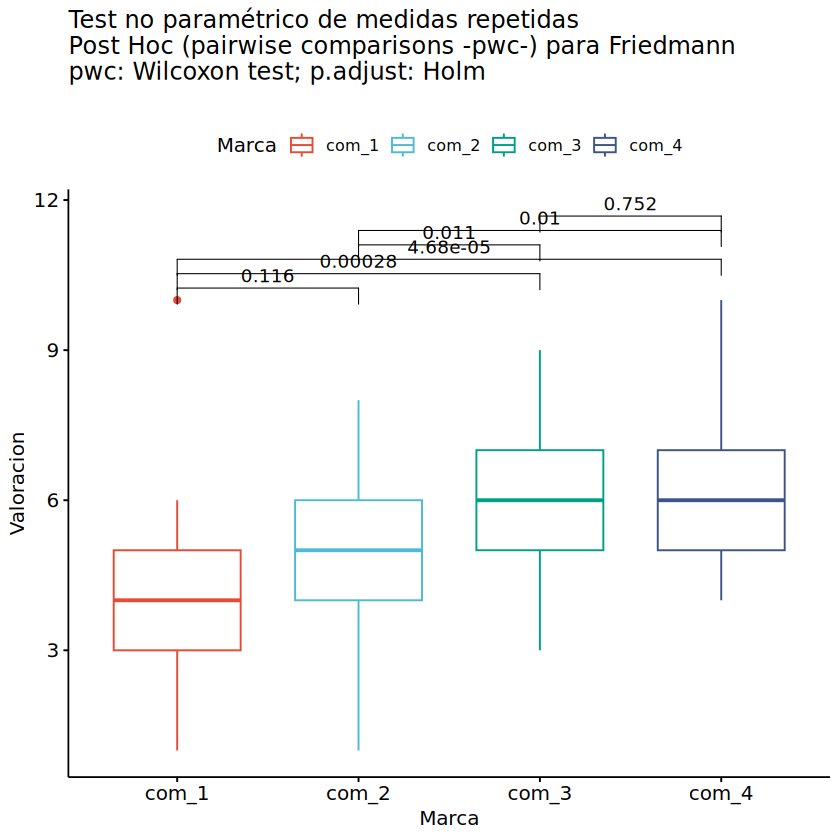

In [32]:
formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))
formula.mr.sin.error

post_pairwise_wilcox_test_mr = pairwise_wilcox_test(formula.mr.sin.error,
                                     data = datos.mr.long,
                                     paired = TRUE)
GraficoCajasPost(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param =  FALSE, es_mr = TRUE, post_pairwise_wilcox_test_mr)

X1,X2
<chr>,<chr>
com_1,com_2
com_1,com_3
com_1,com_4
com_2,com_3
com_2,com_4
com_3,com_4


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

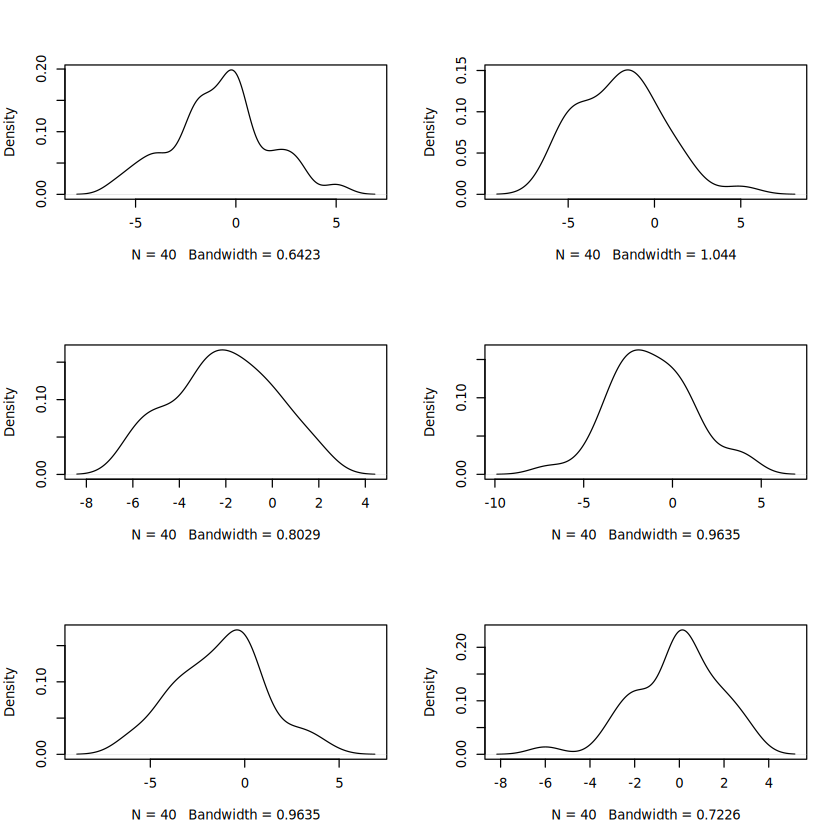

In [33]:
comb = CombPairs(columnas.mr)
comb

par(mfrow=c(3, 2))
sapply(c(1:nrow(comb)) ,
       function(x) plot (density(datos.mr.wide[comb[x,1]][,1] -  datos.mr.wide[comb[x,2]][,1]) , main = ""))

In [34]:
post_frd_eisinga_control = frdManyOneExactTest(y = col.v.depend.mr ,
                                               groups = col.v.factor.mr,
                                               blocks = col.id.factor.mr,
                                               p.adjust.method = "holm")
post_frd_eisinga_control


	Pairwise comparisons using Eisinga-Heskes-Pelzer and Grotenhuis many-to-one test for a two-way balanced complete block design


data: y, groups and blocks



P value adjustment method: holm

alternative hypothesis: two.sided



      com_1  
com_2 0.091  
com_3 2.3e-05
com_4 2.3e-05